# KNN w/o Scikit Learning


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset = [
    (180,7,"Apple"),
    (200, 6, 'Apple'),
    (150, 4, 'Orange'),
    (170, 5, 'Orange'),
    (160, 6, 'Apple'),
    (140, 3, 'Orange')
]
new_fruit = (165,5.5)

In [3]:
dataset

[(180, 7, 'Apple'),
 (200, 6, 'Apple'),
 (150, 4, 'Orange'),
 (170, 5, 'Orange'),
 (160, 6, 'Apple'),
 (140, 3, 'Orange')]

In [4]:
def euclidean_distance(fruit1 , fruit2):
    return np.sqrt((fruit1[0] - fruit2[0])**2 + (fruit1[1] - fruit2[1])**2)

In [22]:
def knn_classify(new_fruit,dataset,k):
    distances = []
    for weight,sweetness,label in dataset:
        dist = euclidean_distance(new_fruit(weight,sweetness))
        distances.append((dist,label))
        
    distances.sort(key=lambda x:x[0])
    nearest_neighbors = distances[:k]
    
    vote_count = {}
    
    for neighbor in nearest_neighbors:
        label = neighbor[1]
        if label in vote_count:
            vote_count[label] += 1
        else:
            vote_count[label] = 1
            
    predicted_label = max(vote_count , key= vote_count.get)
    return predicted_label
    

In [23]:
predicted_label_k3 = knn_classify(new_fruit,dataset,k=3)
print(predicted_label_k3)

Apple


In [24]:
for k in [1, 3, 5]:
    predicted_label = knn_classify(new_fruit, dataset, k)
    print(f"The new fruit classified with k={k} is: {predicted_label}")

The new fruit classified with k=1 is: Orange
The new fruit classified with k=3 is: Apple
The new fruit classified with k=5 is: Orange


## Plot

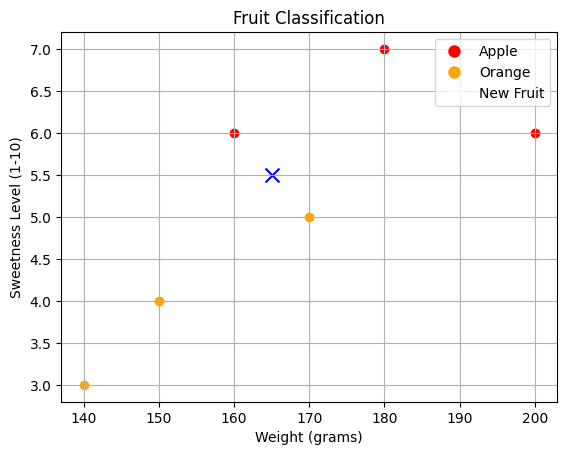

In [25]:
def plot_fruits(dataset, new_fruit):
    plt.figure()
    for weight, sweetness, label in dataset:
        color = 'red' if label == 'Apple' else 'orange'
        plt.scatter(weight, sweetness, color=color)
    
    plt.scatter(new_fruit[0], new_fruit[1], color='blue', marker='x', s=100, label='New Fruit')

    plt.title('Fruit Classification')
    plt.xlabel('Weight (grams)')
    plt.ylabel('Sweetness Level (1-10)')
    
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label='Apple', markerfacecolor='red', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Orange', markerfacecolor='orange', markersize=10),
        plt.Line2D([0], [0], marker='x', color='w', label='New Fruit', markerfacecolor='blue', markersize=10)
    ]
    plt.legend(handles=handles)
    plt.grid()
    plt.show()

plot_fruits(dataset, new_fruit)

In [ ]:
h